# Iris Dataset Analysis with Pandas

This notebook explores the famous **Iris dataset** using Pandas DataFrames.  
The dataset contains 150 samples of iris flowers with four features:
- Sepal length
- Sepal width
- Petal length
- Petal width  

The goal is to compare these features and understand the relationships between them.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [3]:
iris = load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [6]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

## Loading the Iris Dataset
The Iris dataset is loaded from `sklearn.datasets`.  
We then convert it into a Pandas DataFrame for easier manipulation and analysis.


In [7]:
df = pd.DataFrame(data = np.c_[iris['data'],iris['target']],
                 columns = iris['feature_names'] + ['Class'])


In [8]:
df.tail(8)
#df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
142,5.8,2.7,5.1,1.9,2.0
143,6.8,3.2,5.9,2.3,2.0
144,6.7,3.3,5.7,2.5,2.0
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [9]:
print(df['Class'])

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: Class, Length: 150, dtype: float64


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

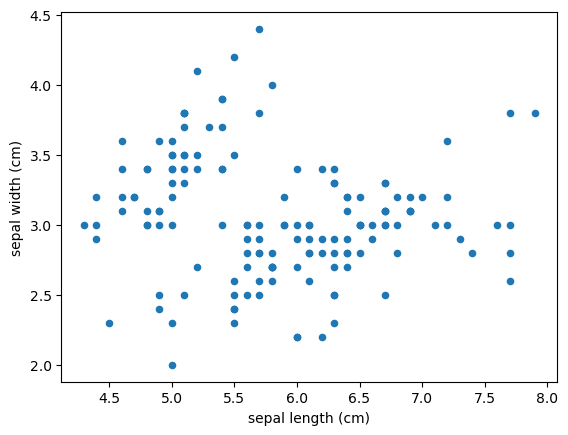

In [10]:
df.plot(kind = 'scatter' , x = 'sepal length (cm)',y ='sepal width (cm)' )

In [11]:
## df.plot(kind = 'scatter' , x = 'sepal length (cm)',y ='sepal width (cm)',c = 'Class')

<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

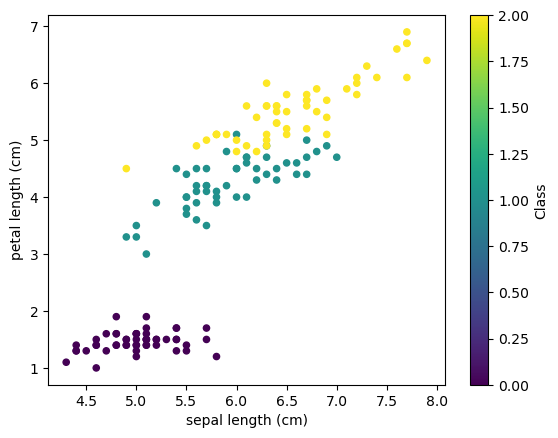

In [12]:
df.plot(kind = 'scatter' , x = 'sepal length (cm)',y ='petal length (cm)',c = 'Class')

## Assigning Colors to Flowers

To make the visualization more intuitive, we assign a unique color to each species of iris flower.  
This helps us clearly distinguish the three classes (`setosa`, `versicolor`, and `virginica`) in plots.  

We define a function that maps each species to a specific color:
- **Setosa** → Red  
- **Versicolor** → Blue
- **Virginica** → Yellow  


In [13]:
def addcolor(species):
    if species == 0:
        return 'red'
    elif species == 1:
        return 'blue'
    else :
        return 'yellow'

df['colors'] = df['Class'].apply(addcolor)
                

In [14]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class,colors
0,5.1,3.5,1.4,0.2,0.0,red
1,4.9,3.0,1.4,0.2,0.0,red
2,4.7,3.2,1.3,0.2,0.0,red
3,4.6,3.1,1.5,0.2,0.0,red
4,5.0,3.6,1.4,0.2,0.0,red
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,yellow
146,6.3,2.5,5.0,1.9,2.0,yellow
147,6.5,3.0,5.2,2.0,2.0,yellow
148,6.2,3.4,5.4,2.3,2.0,yellow


<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

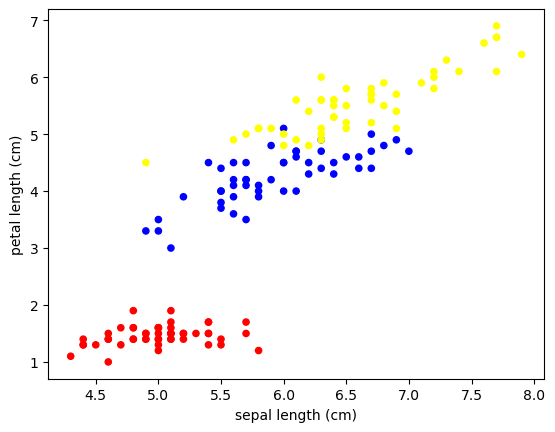

In [15]:
df.plot(kind = 'scatter' , x = 'sepal length (cm)',y ='petal length (cm)',c = 'colors')

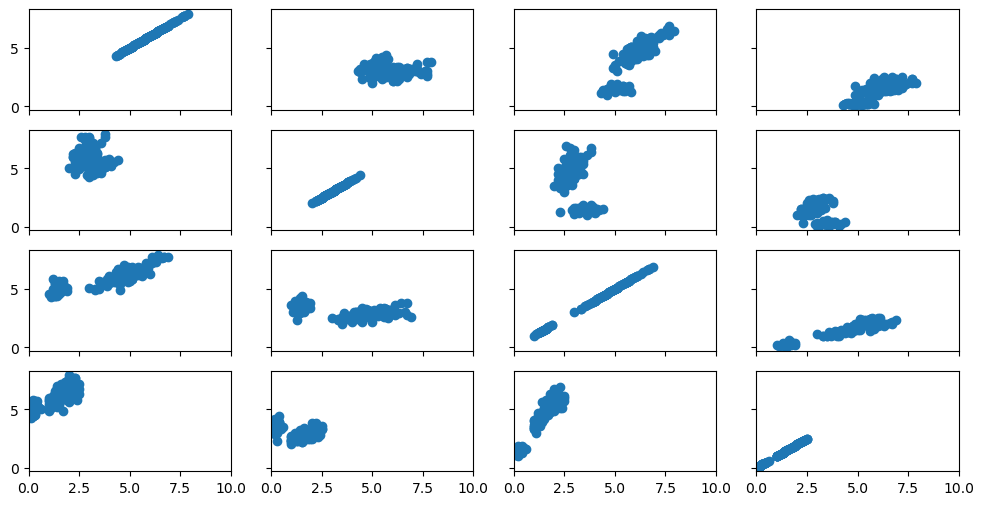

In [17]:
fig,ax = plt.subplots(4,4, figsize = (12,6 ),sharex = True, sharey = True)

for featurex,axr in enumerate(ax):
    for featurey,axrc in enumerate(axr):
        axrc.scatter(df.iloc[:,featurex], df.iloc[:,featurey])
        axrc.set(xlim = (0,10))
     
    

## Comparing Features
We compare different features using:
- Pairwise comparisons
- Visualizations


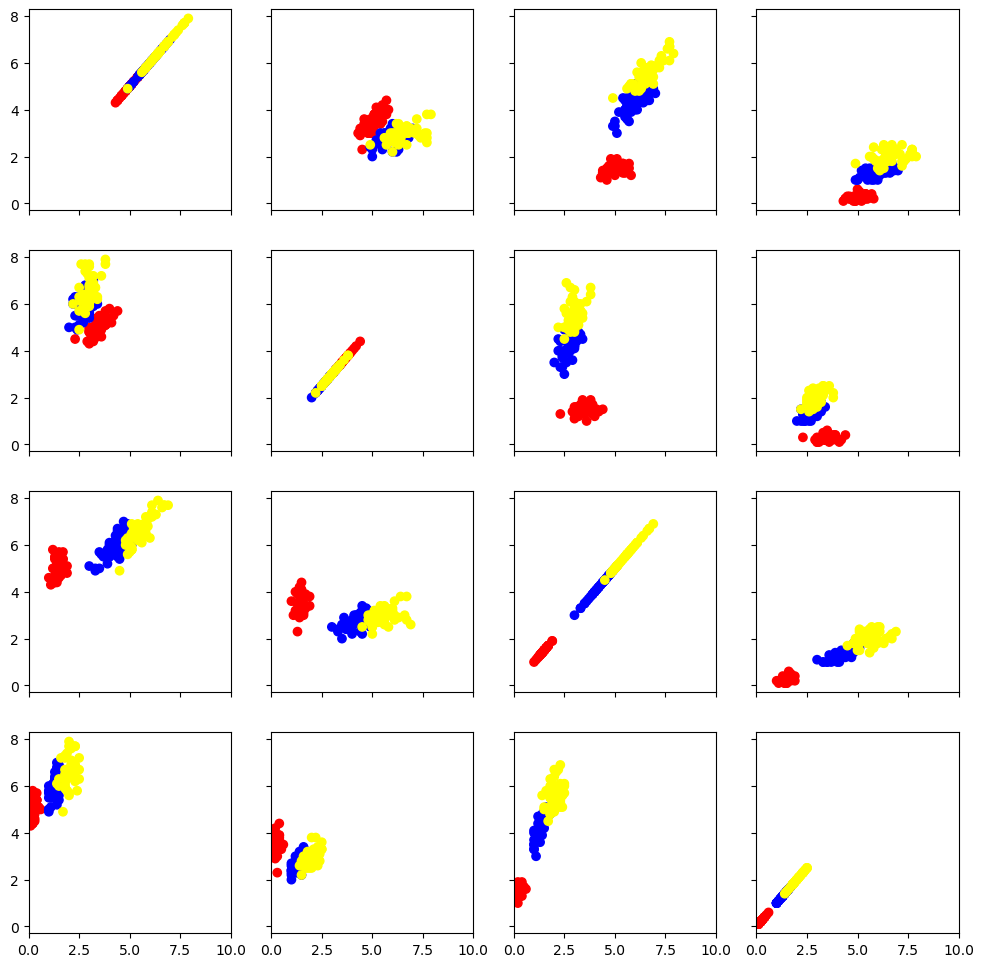

In [18]:
fig,ax = plt.subplots(4,4, figsize = (12,12 ),sharex = True, sharey = True)

for featurex,axr in enumerate(ax):
    for featurey,axrc in enumerate(axr):
        axrc.scatter(df.iloc[:,featurex], df.iloc[:,featurey],c = df['colors'])
        axrc.set(xlim = (0,10))
     
    

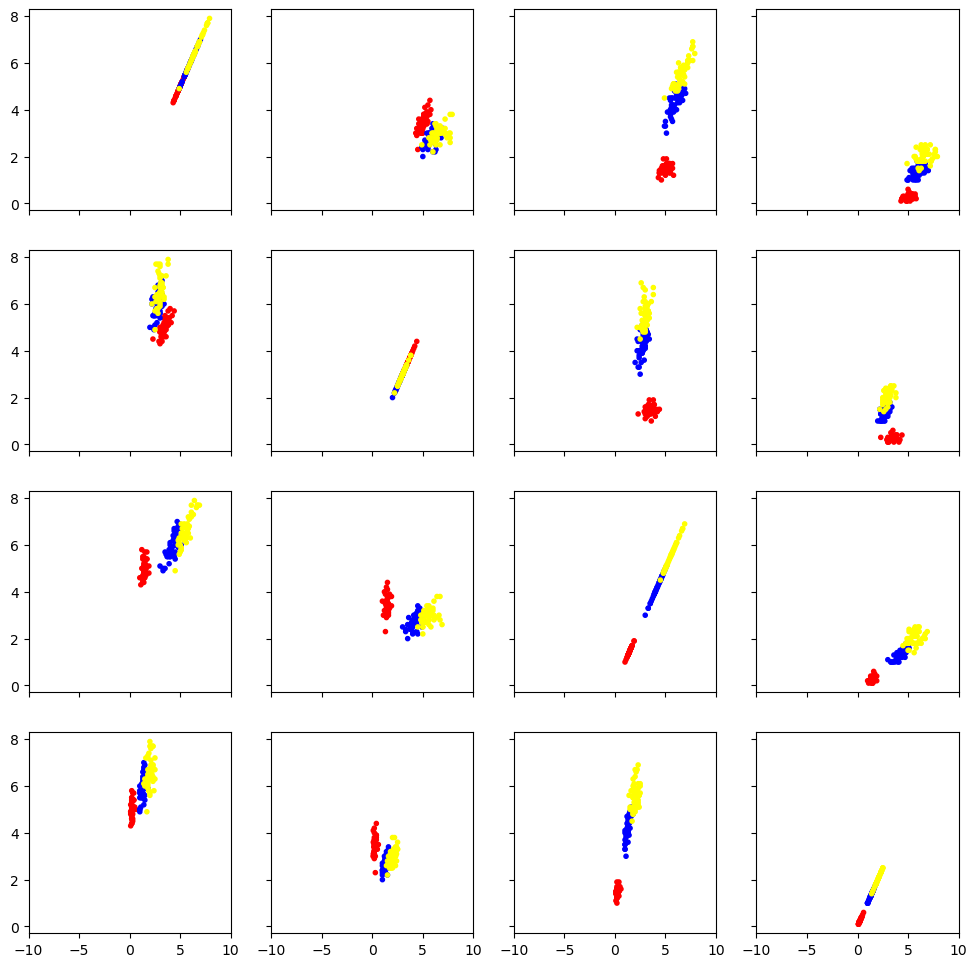

In [19]:
fig,ax = plt.subplots(4,4, figsize = (12,12),sharex = True, sharey = True)

for featurex,axr in enumerate(ax):
    for featurey,axrc in enumerate(axr):
        axrc.scatter(df.iloc[:,featurex], df.iloc[:,featurey],c = df['colors'], s = 9)
        axrc.set(xlim = (-10,10))
     

In [46]:

df[df.loc[:,'sepal length (cm)'] > 5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class,colors
0,5.1,3.5,1.4,0.2,0.0,red
5,5.4,3.9,1.7,0.4,0.0,red
10,5.4,3.7,1.5,0.2,0.0,red
14,5.8,4.0,1.2,0.2,0.0,red
15,5.7,4.4,1.5,0.4,0.0,red
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,yellow
146,6.3,2.5,5.0,1.9,2.0,yellow
147,6.5,3.0,5.2,2.0,2.0,yellow
148,6.2,3.4,5.4,2.3,2.0,yellow


# Wine Dataset Analysis with Pandas

The Wine dataset contains the chemical analysis of wines grown in the same region in Italy.  
It includes **178 samples** with **13 features** such as alcohol, ash, flavanoids, and color intensity.  

The target variable is the wine **class (1, 2, or 3)**.  
We will use Pandas DataFrames to compare features and understand which chemical properties separate the classes.


In [21]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [22]:
wine = load_wine()

In [25]:
df1 = pd.DataFrame(data = np.c_[wine['data'],wine['target']],
                 columns = wine['feature_names'] + ['Class'])
df1


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [26]:
df1.head(100)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937.0,1.0
96,11.81,2.12,2.74,21.5,134.0,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625.0,1.0
97,12.29,1.41,1.98,16.0,85.0,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428.0,1.0
98,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0,1.0


In [27]:
df1.tail(100)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0,1.0
79,12.70,3.87,2.40,23.0,101.0,2.83,2.55,0.43,1.95,2.57,1.19,3.13,463.0,1.0
80,12.00,0.92,2.00,19.0,86.0,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278.0,1.0
81,12.72,1.81,2.20,18.8,86.0,2.20,2.53,0.26,1.77,3.90,1.16,3.14,714.0,1.0
82,12.08,1.13,2.51,24.0,78.0,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [28]:
df1.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


<Axes: xlabel='ash', ylabel='malic_acid'>

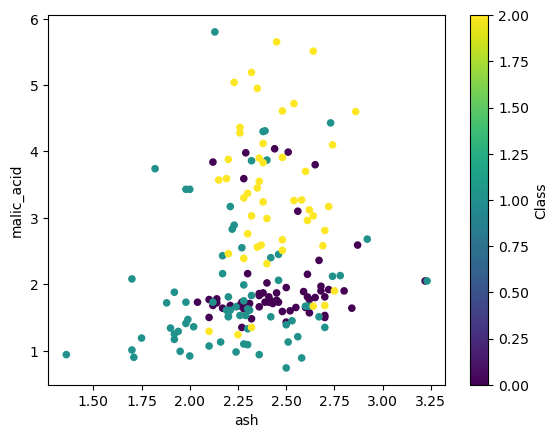

In [29]:
df1.plot(kind = 'scatter' , x = 'ash',y ='malic_acid' , c = 'Class')

<class 'numpy.ndarray'>
2 (13, 13)


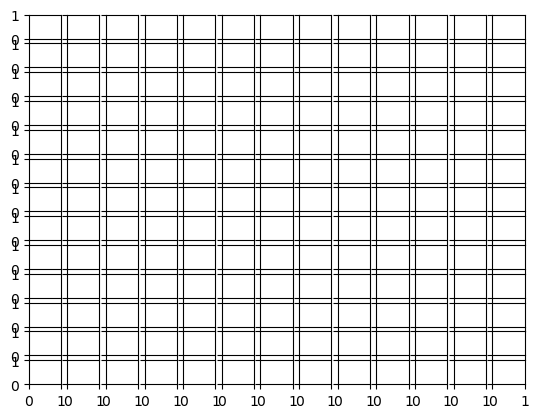

In [30]:
fig1, ax1 = plt.subplots(13,13, sharex = True , sharey = True )
print(type(ax1))
print(ax1.ndim,ax1.shape)

## Comparing Features
We compare alcohol, flavanoids, proline, and color intensity across wine classes.


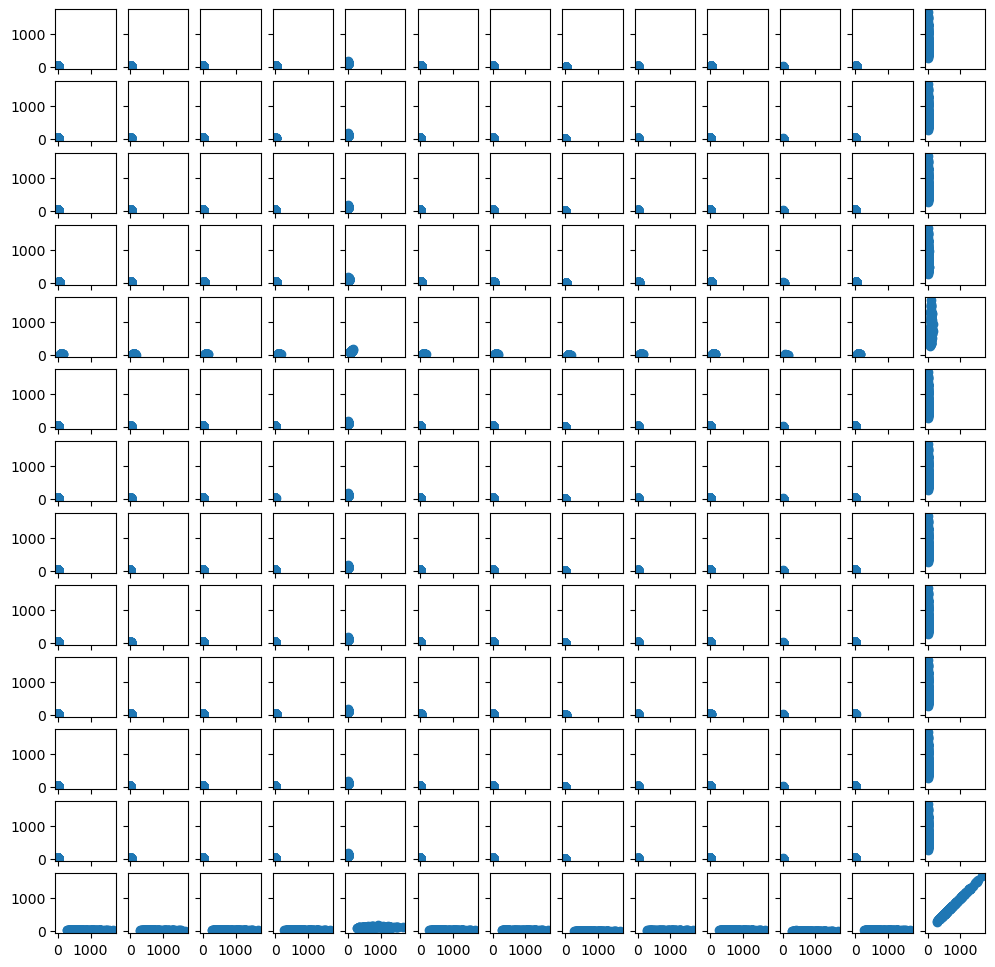

In [31]:
fig1,ax1 = plt.subplots(13,13, figsize = (12,12 ), sharex=True, sharey=True)

for featurex1,axr1 in enumerate(ax1):
    for featurey1,axrc1 in enumerate(axr1):
        axrc1.scatter(df1.iloc[:,featurex1], df1.iloc[:,featurey1])
        #axrc1.set(xlim = (0,10))
     

In [32]:
def addcolor1(species):
    if species == 0:
        return 'red'
    elif species == 1:
        return 'blue'
    else :
        return 'yellow'

df1['color'] = df1['Class'].apply(addcolor)
                

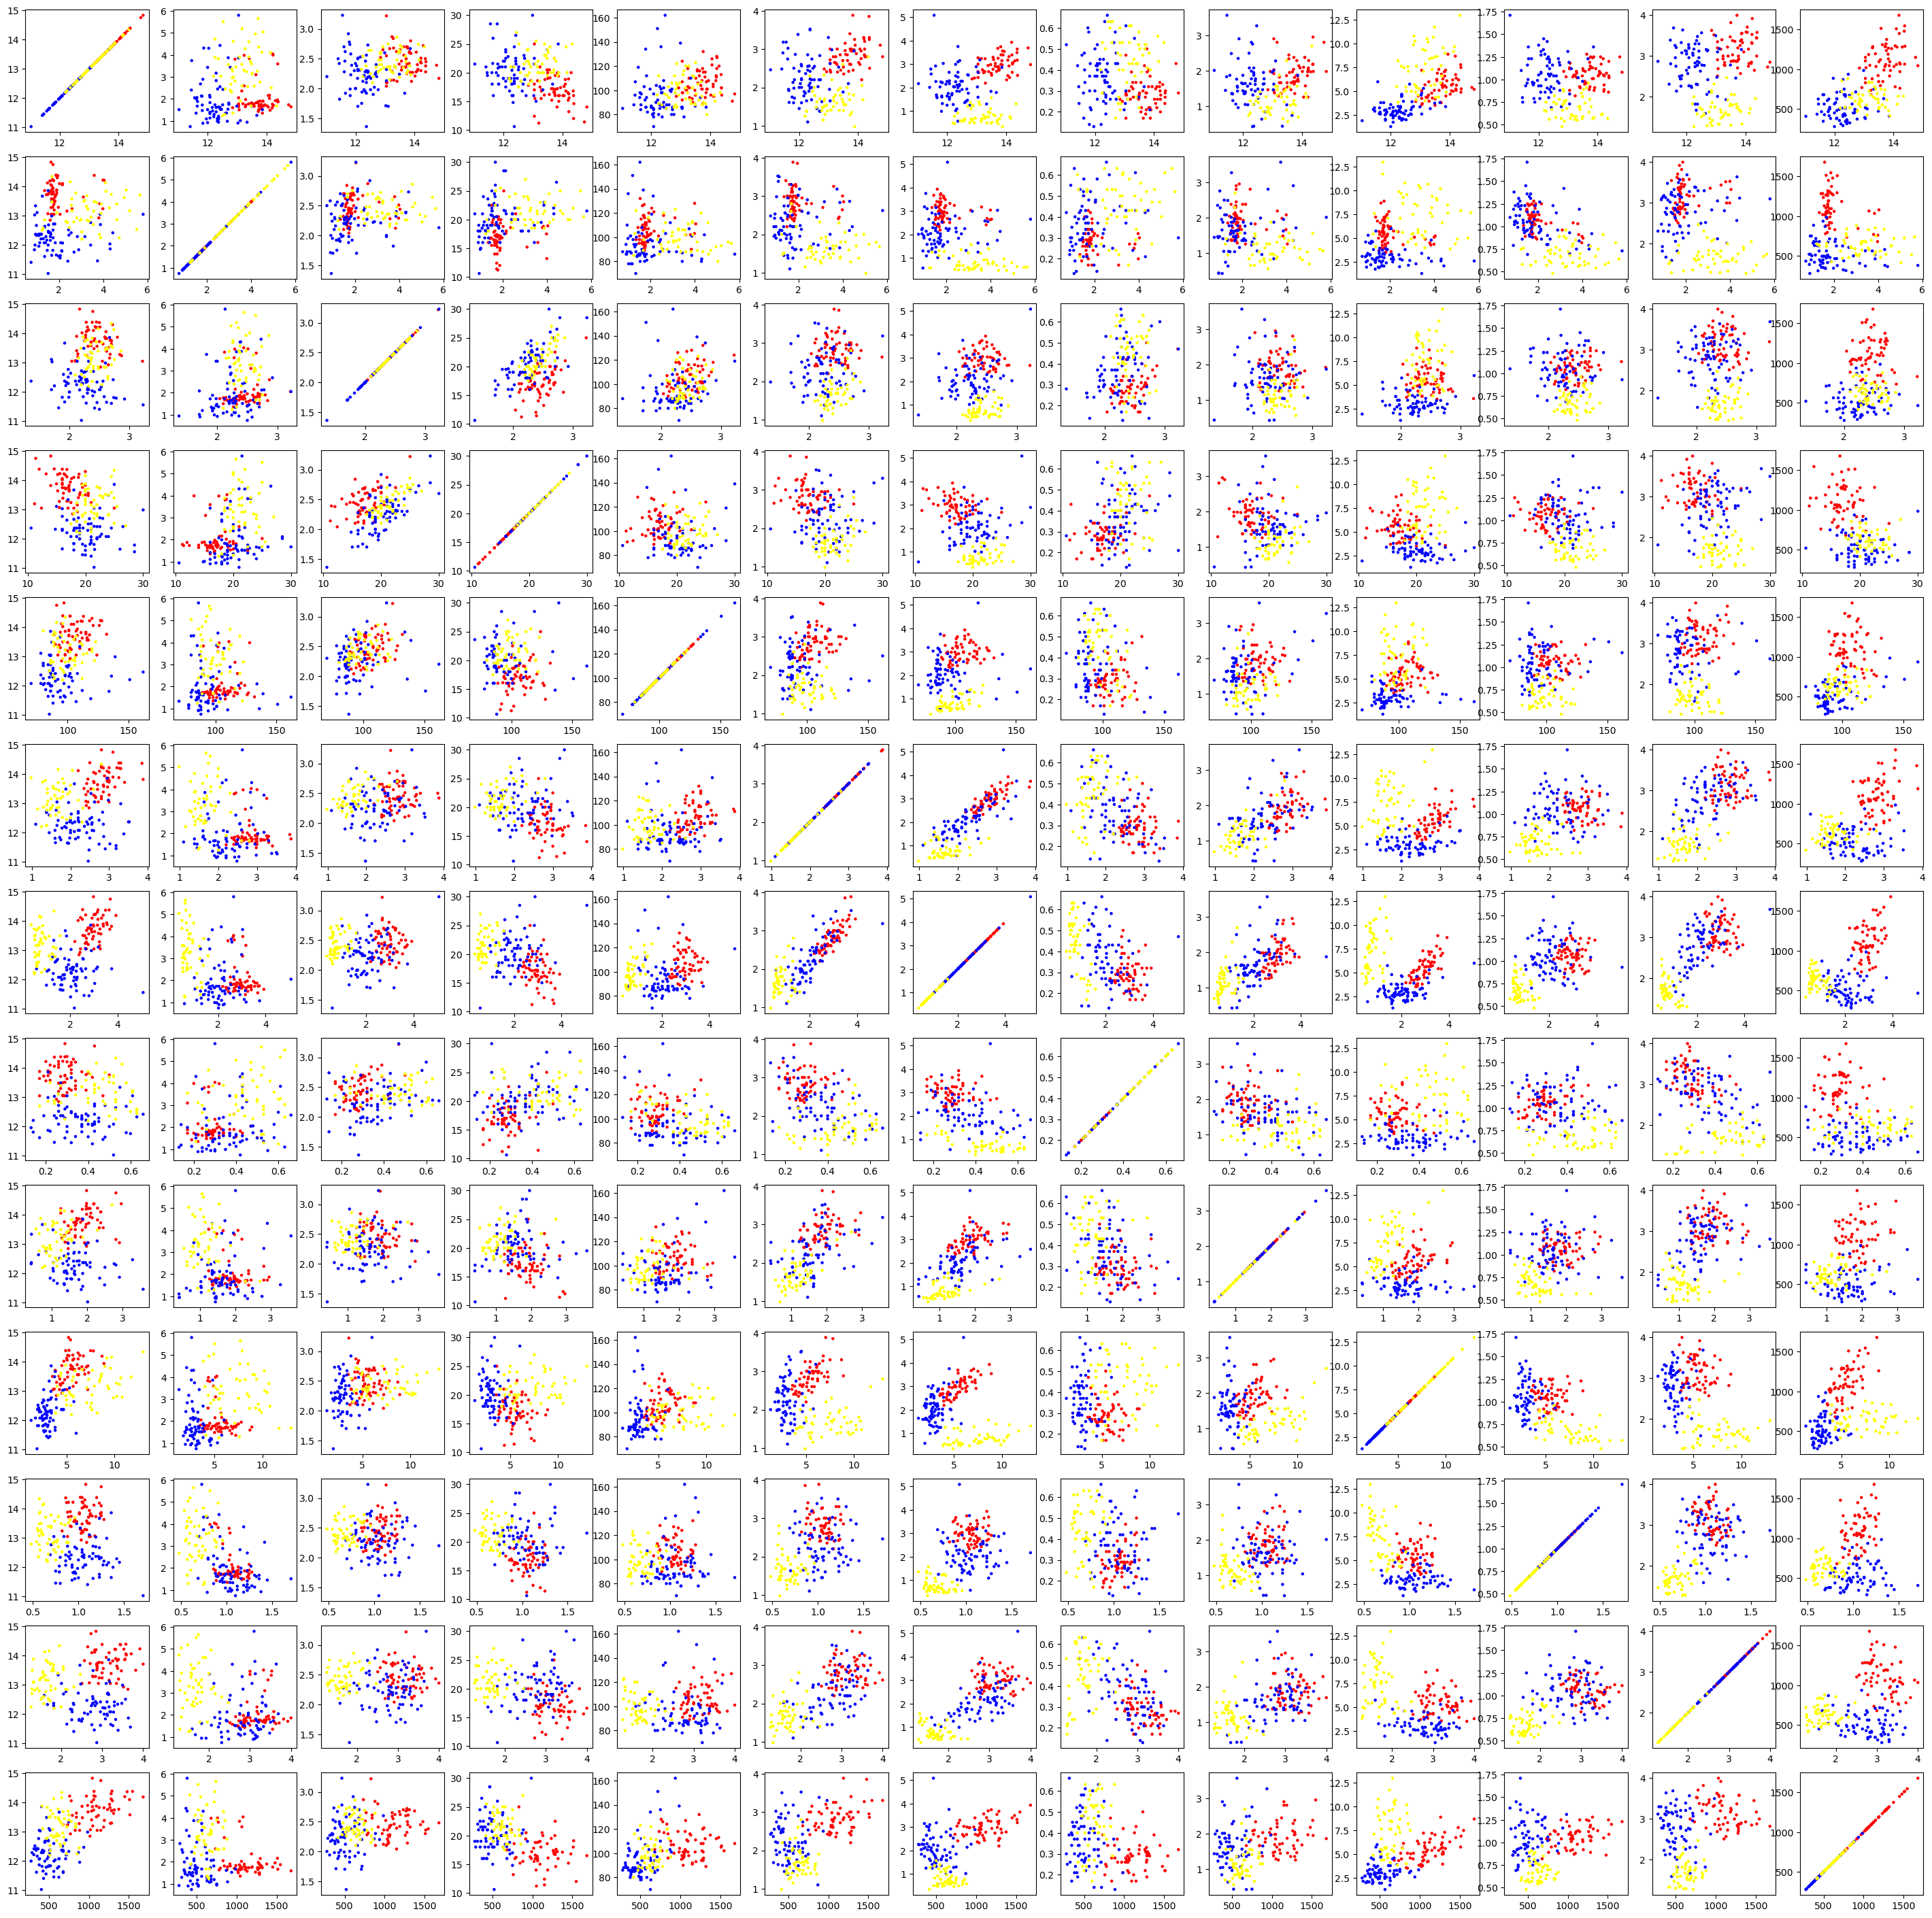

In [33]:
fig1,ax1 = plt.subplots(13,13, figsize = (36,36 ))

for featurex1,axr1 in enumerate(ax1):
    for featurey1,axrc1 in enumerate(axr1):
        axrc1.scatter(df1.iloc[:,featurex1], df1.iloc[:,featurey1],c = df1['color'],s = 5)
        #axrc1.set(xlim = (-10,10))
     

In [34]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split


In [35]:
ch = fetch_california_housing()
print(ch.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [36]:
print(ch['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [37]:
df2 = pd.DataFrame(data = np.c_[ch['data'],ch['target']],
                 columns = ch['feature_names'] + ['Class'])
df2


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Class
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [38]:
df2.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Class
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<class 'numpy.ndarray'>
2 (8, 8)


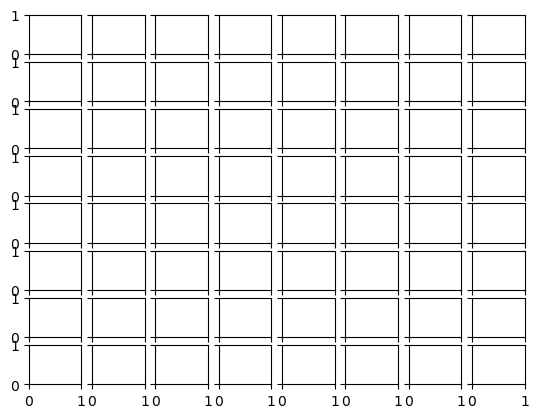

In [39]:
fig2, ax2 = plt.subplots(8,8, sharex = True , sharey = True )
print(type(ax2))
print(ax2.ndim,ax2.shape)

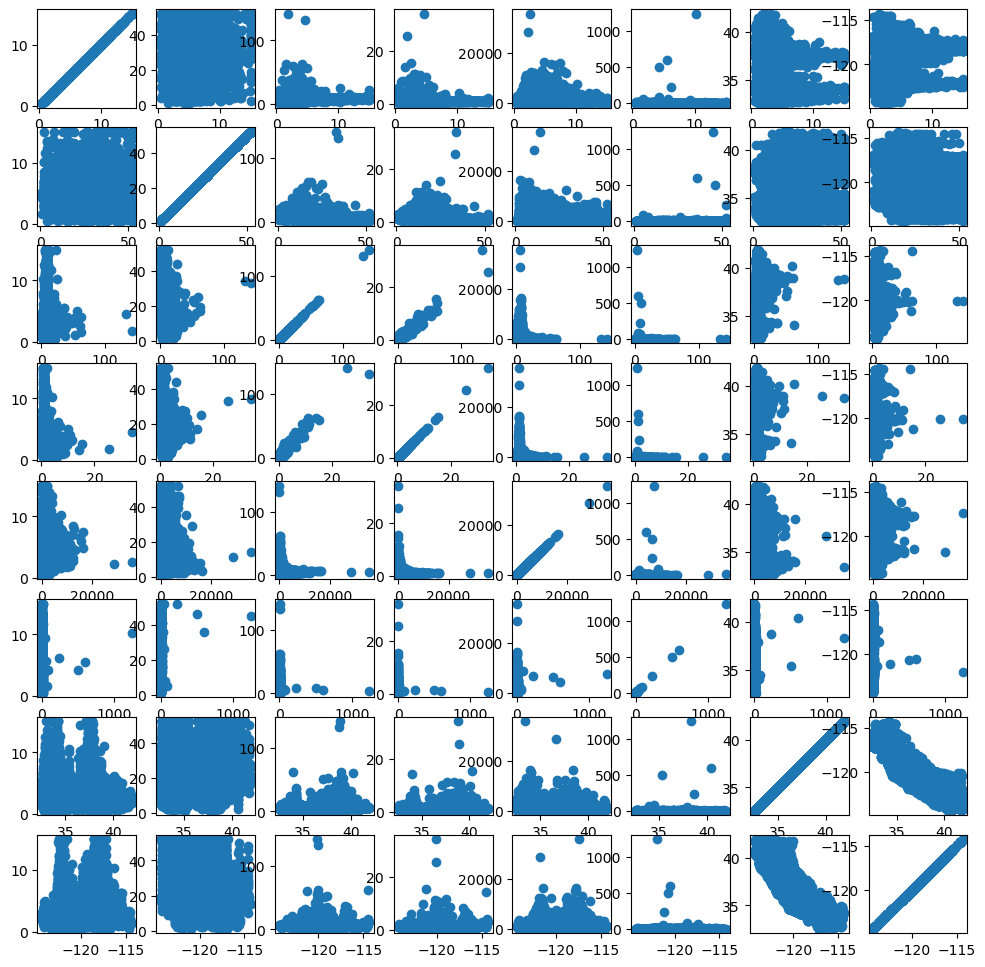

In [40]:
fig2,ax2 = plt.subplots(8,8, figsize = (12,12 ))

for featurex2,axr2 in enumerate(ax2):
    for featurey2,axrc2 in enumerate(axr2):
        axrc2.scatter(df2.iloc[:,featurex2], df2.iloc[:,featurey2])
        #axrc2.set(xlim = (0,10))
     